# Data Cleaning 🚮
![sacando_basura_ds](https://i.imgflip.com/4xy2fr.jpg)



En análisis de datos, aproximadamente del 60% al 80% del tiempo es invertido en limpiar y organizar los datos, y con justa razón, pues la limpieza de datos es la etapa previa al interrogatorio que llevaremos a cabo posteriormente para obtener información. Este proceso rara vez se realiza en una sola ocasión, suele ser un proceso iterativo.
En esta lectura, abordaremos algunos de los casos más comunes de "datos sucios" y cómo afrontarlos.


> Nuestros Paquetes

        - import pandas as pd   - Tratamiento de datos
        - import numpy as np    - Biblioteca numerica de python
        - import seaborn as sns - Graficas basadas en Matplotlib
        - import datetime       - Manejo y tratamiento de Fechas
        - import chardet        - Modulo de Encoding para caracteres

> Nuestros Datasets

        - Dataset Derrumbes By NASA (https://www.kaggle.com/nasa/landslide-events)
        - Dataset Terremotos By Us Geological Survey (https://www.kaggle.com/usgs/earthquake-database)
        - Dataset Fifa By Karan Gadiya (https://www.kaggle.com/karangadiya/fifa19/)
        - Dataset Adult By Ronny Kohavi and Barry Becker (http://archive.ics.uci.edu/ml/datasets/Adult)
        - Dataset Kickstarter By Mickaël Mouillé obtained with Kickstarter Platform API (https://www.kaggle.com/kemical/kickstarter-projects)

### Python importamos paquetes

In [15]:
import pandas as pd  
import numpy as np   
import seaborn as sns 
import datetime
import chardet

### Leer Datasets  (Pandas)

In [16]:
pd.__version__
earthquakes = pd.read_csv('databases/terremotos.csv')
derrumbes = pd.read_csv('databases/derrumbes.csv')
fifa = pd.read_csv('databases/fifa.csv')
fifaM = pd.read_csv('databases/fifaM.csv')
adult = pd.read_csv('databases/adult.csv')
chavos_prepa = pd.read_csv('databases/snsdata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,4,8,9,14,16,17,18,23,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Manejo y transformación de Fechas

In [ ]:
# Vamos a utilizar para las fechas datasets con terremoetos entre 1965 y 2016 y con Derrumbes enre 2007 y 2016

print(derrumbes)

In [ ]:
# Checar Tipo de Dato de la columna fecha en los derrumbes
print(derrumbes['date'].head())

In [ ]:
# dtype: object PAndas usa el Object para referirse a varios tipos de datos pero normalmente son strings
derrumbes['date'].dtype

In [ ]:
# Transformar a fechas de a devis
derrumbes['date_parsed'] = pd.to_datetime(derrumbes['date'], format = "%m/%d/%y")
print(derrumbes['date_parsed'].head())

In [ ]:
derrumbes

In [ ]:
dia_del_mes_derrumbes = derrumbes['date_parsed'].dt.day
dia_del_mes_derrumbes

In [ ]:
# Grafiquemos para double-check
# doesn't hurt to double-check that the days of the month we've extracted make sense.

dia_del_mes_derrumbes = dia_del_mes_derrumbes.dropna()
#sns.histplot(dia_del_mes_derrumbes, kde=False, bins=31)


In [ ]:
# Que pasa si la fecha de un Dataset viene en varios Formatos???
accounts = pd.read_csv('databases/accounts.csv')
print(accounts)

In [ ]:
# Notilla extra, si en la columna a parsear hay varios tipos de formato de fecha, mejor decirle al python que la infiera
accounts['date_opened_parsed'] = pd.to_datetime(accounts['date_opened'], infer_datetime_format=True)
print(accounts['date_opened_parsed'])

### Remover y reemplazar  y modificar caracteres no deseados
Otro problema común es la presencia de caracteres que no deseamos en nuestros valores. Estos pueden constituir alguno de los siguientes casos:
 - Caracteres erróneos introducidos por error humano o error de máquina al realizar los registros.
 - Caracteres que fueron introducidos para indicar una divisa, unidad de medida, categoría, etc. O bien para simplificar los datos.
 - Caracteres erróneos introducidos por una cambio en la codificación de nuestro sistema respecto a la codificación de los datos.

In [ ]:
adult


In [ ]:
adult.info()

In [ ]:
adult[' Male'] = adult[' Male'].str.replace(' ', '')
adult[' Male']


In [ ]:
adult= adult.rename(columns={' Male': 'Male'})

In [ ]:
adult.info()

### Otros tipos de caracteres no deseados

In [ ]:
# Utilizaremos la Bd de fifa
fifa

In [ ]:
#Veamos su estructura
fifa.info()

#### Que tal ahora una descipcion estadística? 🙈

In [ ]:
fifa.describe()

In [ ]:
fifa['Wage']

In [ ]:
fifa['wage_trimmed'] = fifa['Wage'].str.translate({ord(i): None for i in '€K'})
fifa['wage_trimmed']

In [ ]:
fifa['wage_numeric'] = fifa['wage_trimmed'].astype(int) * 1000

In [ ]:
fifa['wage_numeric'].head(10)

#### Otro tipo de caso aunque similiar tiene un particularidad 🤐

In [18]:
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.translate({ord('€'): None})
fifaM

,Unnamed: 0,X,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
0,1,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,...,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,565M
1,2,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,...,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,405M
2,3,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,...,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,290M
3,4,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,...,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,260M
4,5,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,...,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,355M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18203,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,...,45,40,48,47,10,13,7,8,9,143K
18203,18204,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,...,42,22,15,19,10,9,9,5,12,113K
18204,18205,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,...,41,32,13,11,6,5,10,6,13,165K
18205,18206,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,...,46,20,25,27,14,6,14,8,9,143K


In [19]:
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.replace('K', '000')
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.replace('M', '000000')

In [20]:
print(fifaM['Release.Clause'])

0        565000000
1        405000000
2        290000000
3        260000000
4        355000000
           ...    
18202       143000
18203       113000
18204       165000
18205       143000
18206       165000
Name: Release.Clause, Length: 18207, dtype: object



## Vamos bien!!


![vas_bien](https://i.pinimg.com/564x/86/1f/c0/861fc0bbaf64bd6c65a8bf6472514300.jpg)

#### Que bueno que fifa traía el simbolo de Euro como simbolo de Euro, no? Pero. qué pasa si el dataset tiene algo como esto:
#### æ–‡å—åŒ–ã?? o ����������

In [ ]:
##  What Are encodings???? ##

# Character encodings are specific sets of rules for mapping from raw binary byte strings 
# (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi")
# UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. 
# It's when things aren't in UTF-8 that you run into trouble.

before = "This is the euro symbol: €"
type(before)


In [ ]:
print(before)

In [ ]:
after = before.encode("utf-8", errors = "replace")
type(after)

In [ ]:
after

In [ ]:
print(after.decode("ascii"))

In [ ]:
print(after.decode("utf-8"))

In [ ]:
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")


In [ ]:
after

In [ ]:
# convert it back to utf-8
print(after.decode("ascii"))

## The best time to convert non UTF-8 input into UTF-8 is when you read in files


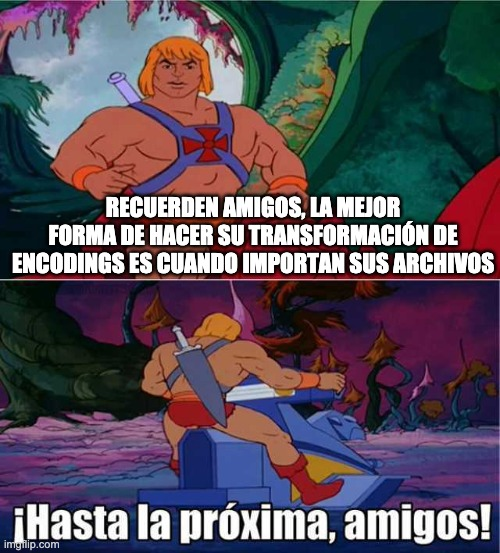

In [ ]:
polis = pd.read_csv("databases/PoliceKillingsUS.csv")

In [ ]:
Police_Killing = pd.read_csv("databases/PoliceKillingsUS.csv", encoding='utf-8')

In [ ]:
with open("databases/PoliceKillingsUS.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    
print(result)


In [ ]:
Police_Killing = pd.read_csv("databases/PoliceKillingsUS.csv", encoding='Windows-1252')
Police_Killing.head()

In [ ]:
#Ejercicio 
#kickstarter_2016 = pd.read_csv("databases/kickstarter-encoding.csv")

## Valores Fuera de Rango y valores perdidos
Cuando hacemos limpieza de datos, siempre es necesario recurrir a nuestro conocimiento del tema y del origen de la base de datos para saber si estos tienen sentido. A veces puede ser algo tan complicado como cuadrar cantidades que cambian en el tiempo respecto de otras 2 o 3 variables, o puede ser algo más del "sentido común" como identificar que un valor negativo en una columna de edades constituye una anomalía.

In [22]:
chavos_prepa = pd.read_csv('databases/snsdata.csv')
chavos_prepa

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
chavos_prepa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [24]:
chavos_prepa.describe(include='all')

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,27276,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.500000,NaN,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,NaN,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,NaN,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,NaN,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,NaN,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,NaN,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# Vamos a ver cuantos Valores NA tenemos en nuestra columna de Age
missing_values_age_count = chavos_prepa['age'].isnull().sum()
missing_values_age_count

5086

In [26]:
number_of_rows = len(chavos_prepa)
number_of_rows

30000

In [27]:
print('Porcentaje total de Edades perdidas en el dataset es:', (missing_values_age_count/number_of_rows) *100)

Porcentaje total de Edades perdidas en el dataset es: 16.953333333333333


In [28]:
chavos_prepa['age'].dropna()

0        18.982
1        18.801
2        18.335
3        18.875
4        18.995
          ...  
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age, Length: 24914, dtype: float64

![morro_meco](https://pbs.twimg.com/media/Edm2smXU4AArpjW.jpg)

### Truco aquí 👇🏼

In [29]:
chavos_prepa['age_filled'] = np.where(chavos_prepa['age'].isnull(), np.mean(chavos_prepa['age']), chavos_prepa['age'])
chavos_prepa['age_filled']

0        18.982
1        18.801
2        18.335
3        18.875
4        18.995
          ...  
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age_filled, Length: 30000, dtype: float64

In [30]:
chavos_prepa_count = chavos_prepa['age_filled'].isnull().sum()
chavos_prepa_count

0

### Acotar Valores y double double check 🙌🏼

In [31]:
## Crearemos un histograma para identificar valores fuera de rango
# Creamos los cortes
min_teen_age = 12
max_teen_age = 21

<AxesSubplot:xlabel='age_filled', ylabel='Count'>

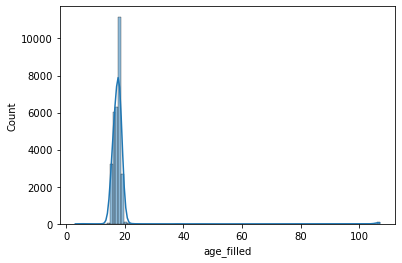

In [32]:
sns.histplot(chavos_prepa['age_filled'], kde=True, bins=int(np.max(chavos_prepa['age_filled'])))

In [ ]:
# Reemplazamos las edades por encima del rango con la edad máxima

chavos_prepa['age_filled'] = np.where(chavos_prepa['age_filled'] > max_teen_age, max_teen_age, chavos_prepa['age_filled'])

print(int(np.max(chavos_prepa['age_filled'])))



In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=True, bins=int(np.max(chavos_prepa['age_filled'])))

In [ ]:
# Reemplazamos las edades por debajo del rango con la edad mínima

chavos_prepa['age_filled'] = np.where(chavos_prepa['age_filled'] < min_teen_age, min_teen_age, chavos_prepa['age_filled'])

print(int(np.min(chavos_prepa['age_filled'])))


In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=False, bins=int(np.max(chavos_prepa['age_filled'])))

### Uniformidad en tipo de cambio

In [ ]:
#  Vamos a ver para que nos va a servir la base anterior

accounts

In [ ]:
sns.scatterplot(data=accounts, x="date_opened_parsed", y="total")

In [ ]:

# The formula to convert yen to dollars is USD = JPY / 104.

account_offices = pd.read_csv('databases/account_offices.csv')

#account_offices.info()
account_offices


In [ ]:
accounts

In [ ]:
accounts_global = pd.merge(accounts, account_offices, on="id")
print(accounts_global)

In [ ]:
accounts_global['total_usd'] = np.where(accounts_global['office'] == 'Tokyo', accounts_global['total'] / 104, accounts_global['total'])
print(accounts_global)

In [ ]:
sns.scatterplot(data=accounts_global, x="date_opened_parsed", y="total_usd")

### Datos duplicados
![gatos_duplicados](https://s-media-cache-ak0.pinimg.com/originals/d2/4c/c7/d24cc7a35abea701eb36dc58c53a3a1d.jpg)


Este problema se divide en dos tipos

     - Duplicados totales
     - Duplicados parciales


In [34]:
letters = pd.read_csv('databases/letters.csv')
letters

,column1,column2,column3
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
5,a,b,1000
6,a,b,1000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [37]:
duplic = letters.duplicated()
duplic

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
dtype: bool

In [ ]:
sum(letters.duplicated())

In [ ]:
# Remover duplicados totales

letters = letters.drop_duplicates()
sum(letters.duplicated())


In [38]:
letters[duplic]

,column1,column2,column3
5,a,b,1000
6,a,b,1000


In [ ]:
# Weno weno, pero y los duplicados de 1 sola columna???
letters = pd.read_csv('databases/letters.csv')
letters

In [ ]:
letters.rename(columns={"column1": "alumno", "column2": "curso", "column3": "pago"})


In [ ]:
letters.drop_duplicates(subset=['column1'])

## Challenges

Esta colección consta de 5 ejercicios de los problemas típicos de limpieza de datos. Puedes resolverlos directamente en este enlace de [Kaggle](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)